Take synthetic rho data and attempt outlier detection with one other type of a synthetic lightcurve; sine, flat, box function, inverted rho etc (an obvious outlier).

In [2]:
import os
import fnmatch
import csv
import numpy as np
import sys
sys.stdout.flush()
import math

from collections import Counter

from sklearn import tree


import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

import segment_cluster as sc
import importlib
importlib.reload(sc)


np.random.seed(0)

In [33]:
#"normal" lightcurves
rho_file=np.loadtxt("synthetic_rhos.csv", delimiter=',')
rho_train, rho_valid, rho_train_ids, rho_valid_ids= train_test_split(rho_file, list(range(len(rho_file))) ,test_size=0.25)
mean_of_means=np.mean(np.mean(rho_train, axis=1))
std_of_means=np.std(np.mean(rho_train, axis=1))
mean_of_stds=np.mean(np.std(rho_train, axis=1))
std_of_stds=np.std(np.std(rho_train, axis=1))

In [47]:
#"outlier" lightcurves
no_sines=20
lc_len=500
sines=np.zeros((no_sines,lc_len))
for sine in range(no_sines):
    #wavelength of 30-160
    start=np.random.rand()*2*np.pi
    interval=np.random.normal(80, 15)
    xs=np.linspace(start,(lc_len/interval)*2*np.pi+start, num=500)
    ys=np.sin(xs)
    sine_mean=np.random.normal(mean_of_means,std_of_means)
    sine_std=np.random.normal(mean_of_stds,std_of_stds)
    ys=sine_mean+ys*(sine_std/np.std(ys))+np.random.normal(0,200 ,len(ys))
    #mean_ori+(pred_centroid-mean_pred)*(std_ori/std_pred)
    sines[sine,:]=ys

In [48]:
np.std(sines[0])

910.1744397795901

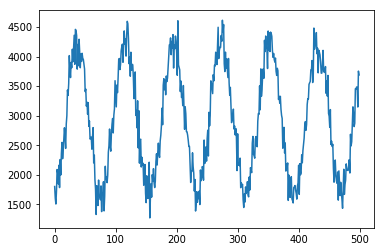

In [49]:
plt.plot(sines[0])